# Data analysis example using cloud infrastructure

Data sources: 
- [NYC Citi Bike Trips](https://citibikenyc.com/system-data)
- [Weather data in BigQuery](https://www.cloudskillsboost.google/focuses/609?parent=catalog)

In [2]:
!gsutil du -sh gs://bu-cds/citibike_trips/trips

8.63 GiB     gs://bu-cds/citibike_trips/trips


In [1]:
#!gsutil ls -lh gs://bu-cds/citibike_trips/trips/

In [4]:
# Get a list of all csv files in target directory
csv_files = !gsutil ls gs://bu-cds/citibike_trips/trips/shard-*.csv

# Read and concatenate all csv files into one dataframe
import pandas as pd
trips_df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

trips_df['starttime'] = pd.to_datetime(trips_df['starttime'])
trips_df['stoptime'] = pd.to_datetime(trips_df['stoptime'])

trips_df['date'] = trips_df.starttime.dt.date

trips_df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,date
0,949,2016-05-18 07:54:48.000,2016-05-18 08:10:37.000,496,E 16 St & 5 Ave,40.737262,-73.992390,519,Pershing Square North,40.751873,-73.977706,15472,Subscriber,1949.0,male,NaN,2016-05-18
1,1333,2016-07-06 12:17:52.000,2016-07-06 12:40:05.000,459,W 20 St & 11 Ave,40.746745,-74.007756,458,11 Ave & W 27 St,40.751396,-74.005226,22929,Subscriber,1949.0,male,NaN,2016-07-06
2,636,2013-09-27 15:56:47.000,2013-09-27 16:07:23.000,520,W 52 St & 5 Ave,40.759923,-73.976485,379,W 31 St & 7 Ave,40.749156,-73.991600,20145,Subscriber,1901.0,male,NaN,2013-09-27
3,789,2014-09-26 15:59:11.000,2014-09-26 16:12:20.000,303,Mercer St & Spring St,40.723627,-73.999496,168,W 18 St & 6 Ave,40.739713,-73.994564,18480,Subscriber,1948.0,male,NaN,2014-09-26
4,1057,2016-09-17 11:33:10.000,2016-09-17 11:50:47.000,285,Broadway & E 14 St,40.734546,-73.990741,350,Clinton St & Grand St,40.715595,-73.987030,26911,Subscriber,1950.0,male,NaN,2016-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53108716,847,2018-05-04 19:28:36.155,2018-05-04 19:42:43.350,525,W 34 St & 11 Ave,40.755942,-74.002116,3472,W 15 St & 10 Ave,40.742754,-74.007474,17397,Customer,1996.0,female,NaN,2018-05-04
53108717,411,2017-12-08 02:22:15.000,2017-12-08 02:29:06.000,435,W 21 St & 6 Ave,40.741740,-73.994156,3244,University Pl & E 8 St,40.731437,-73.994903,16839,Subscriber,1996.0,male,NaN,2017-12-08
53108718,552,2017-08-06 18:32:46.000,2017-08-06 18:41:58.000,3016,Kent Ave & N 7 St,40.720368,-73.961651,3082,Hope St & Union Ave,40.711674,-73.951413,30016,Subscriber,1996.0,female,NaN,2017-08-06
53108719,221,2015-11-06 13:24:17.000,2015-11-06 13:27:58.000,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,382,University Pl & E 14 St,40.734927,-73.992005,18440,Subscriber,1996.0,male,NaN,2015-11-06


In [5]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53108721 entries, 0 to 53108720
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start_station_id         int64         
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int64         
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bikeid                   int64         
 12  usertype                 object        
 13  birth_year               float64       
 14  gender                   object        
 15  customer_plan            float64       
 16  date                     object        
dtypes: datetime64[ns](2), flo

In [6]:
trips_df.tripduration.sum()

51116665216

Are there any missing values in this dataset that we need to handle?

In [7]:
trips_df.isna().sum()

tripduration                      0
starttime                         0
stoptime                          0
start_station_id                  0
start_station_name                0
start_station_latitude            0
start_station_longitude           0
end_station_id                    0
end_station_name                  0
end_station_latitude              0
end_station_longitude             0
bikeid                            0
usertype                          0
birth_year                  5574391
gender                            0
customer_plan              53108721
date                              0
dtype: int64

Could you also check with missingno package? (you might have to install the library if it's your first time using it)

In [8]:
!pip install -q missingno

In [ ]:
import missingno as msno
msno.matrix(trips_df)

What are the most and least popular destination stations?

In [9]:
trips_df.end_station_name.value_counts()

E 17 St & Broadway         444460
Pershing Square North      419931
W 21 St & 6 Ave            407982
West St & Chambers St      399033
Broadway & E 22 St         377854
                            ...  
Communipaw & Berry Lane         1
NJCU                            1
Hilltop                         1
Union St                        1
Jersey & 3rd                    1
Name: end_station_name, Length: 965, dtype: int64

How many minutes is the average duration of a bike ride in this dataset? (original unit: seconds)

In [10]:
trips_df.tripduration.mean()/60

16.041516425648187

What is the maximum duration of a bike ride in this dataset?

In [11]:
trips_df.tripduration.max()/60

325167.48333333334

Looks like we need to remove some bad records. Let's remove all the rows where the duration of a ride is greater than 12 hours (12*60*60 = 43200 seconds)

In [12]:
trips_df[trips_df.tripduration > 43200].shape

(27623, 17)

In [13]:
trips_df = trips_df[trips_df.tripduration < 43200]

How about its distribution?

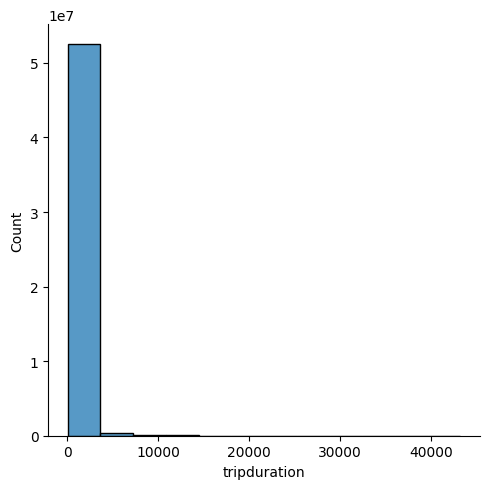

In [14]:
import seaborn as sns
sns.displot(trips_df.tripduration, bins=12, kde=False);

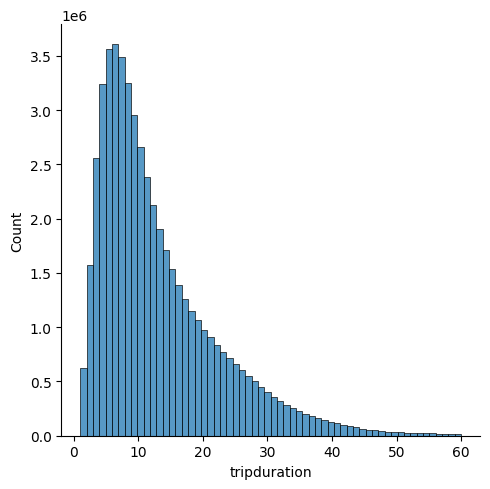

In [15]:
sns.displot(trips_df[trips_df.tripduration < 60*60].tripduration/60, bins=60, kde=False);

How many rides are done by subscribers?

In [16]:
trips_df['usertype'].value_counts()

Subscriber    46903098
Customer       6178000
Name: usertype, dtype: int64

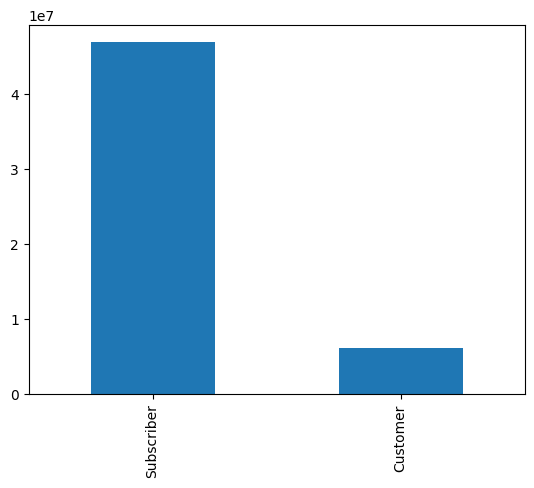

In [17]:
trips_df['usertype'].value_counts().plot(kind='bar');

What's the date range?

In [18]:
print(trips_df.date.min(), trips_df.date.max())

2013-07-01 2018-05-31


In [19]:
%%bigquery weather_df
SELECT * FROM `bigquery-public-data.noaa_gsod.gsod201*`
WHERE stn = '725030' AND wban = '14732'  -- LaGuardia Airport

Query is running:   0%|          |

Downloading:   0%|          |

In [20]:
weather_df['date'] = pd.to_datetime(weather_df['year'] + '-' + weather_df['mo'] + '-' + weather_df['da']).dt.date
weather_df = weather_df[['date', 'prcp', 'temp']]
weather_df

,date,prcp,temp
0,2013-04-10,0.14,62.8
1,2013-03-30,0.00,48.1
2,2013-05-17,0.00,66.9
3,2013-01-20,0.00,46.9
4,2013-02-04,0.03,28.3
...,...,...,...
3647,2016-10-10,0.32,57.0
3648,2016-06-12,0.10,80.2
3649,2016-07-26,0.77,81.7
3650,2016-11-21,0.34,40.7


In [21]:
trips_w_df = trips_df.merge(weather_df, on = 'date')
trips_w_df

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan,date,prcp,temp
0,949,2016-05-18 07:54:48,2016-05-18 08:10:37,496,E 16 St & 5 Ave,40.737262,-73.992390,519,Pershing Square North,40.751873,-73.977706,15472,Subscriber,1949.0,male,NaN,2016-05-18,0.00,59.3
1,672,2016-05-18 08:11:31,2016-05-18 08:22:43,380,W 4 St & 7 Ave S,40.734011,-74.002939,379,W 31 St & 7 Ave,40.749156,-73.991600,22002,Subscriber,1951.0,male,NaN,2016-05-18,0.00,59.3
2,727,2016-05-18 14:35:24,2016-05-18 14:47:32,461,E 20 St & 2 Ave,40.735877,-73.982050,3243,E 58 St & 1 Ave,40.758924,-73.962262,20687,Subscriber,1948.0,male,NaN,2016-05-18,0.00,59.3
3,1368,2016-05-18 07:42:18,2016-05-18 08:05:06,435,W 21 St & 6 Ave,40.741740,-73.994156,340,Madison St & Clinton St,40.712690,-73.987763,20740,Subscriber,1900.0,male,NaN,2016-05-18,0.00,59.3
4,975,2016-05-18 16:25:08,2016-05-18 16:41:24,3223,E 55 St & 3 Ave,40.758997,-73.968654,3230,Penn Station Valet,40.751284,-73.996924,23645,Subscriber,1941.0,female,NaN,2016-05-18,0.00,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53081093,373,2014-02-13 07:44:21,2014-02-13 07:50:34,79,Franklin St & W Broadway,40.719116,-74.006667,309,Murray St & West St,40.714979,-74.013012,16743,Subscriber,1971.0,male,NaN,2014-02-13,0.18,28.7
53081094,377,2014-02-13 10:51:46,2014-02-13 10:58:03,385,E 55 St & 2 Ave,40.757973,-73.966033,456,E 53 St & Madison Ave,40.759711,-73.974023,20896,Subscriber,1972.0,male,NaN,2014-02-13,0.18,28.7
53081095,223,2014-02-13 21:56:53,2014-02-13 22:00:36,290,2 Ave & E 58 St,40.760203,-73.964785,164,E 47 St & 2 Ave,40.753231,-73.970325,20926,Subscriber,1975.0,male,NaN,2014-02-13,0.18,28.7
53081096,817,2014-02-13 16:09:29,2014-02-13 16:23:06,522,E 51 St & Lexington Ave,40.757148,-73.972078,334,W 20 St & 7 Ave,40.742388,-73.997262,21190,Subscriber,1984.0,male,NaN,2014-02-13,0.18,28.7


In [22]:
trips_w_df[['tripduration','prcp','temp']].corr()

,tripduration,prcp,temp
tripduration,1.000000,-0.004393,0.065688
prcp,-0.004393,1.000000,-0.046464
temp,0.065688,-0.046464,1.000000


## At-home exercises
- Find the correlation between the number of rides per day, precipitation, and temperature
- Find the relationship between number of rides and seasons
- Find the relationship between the number of rides and time of day, as well as day of week
- Make a heatmap of the city with popular starting stations as well as destinations
- What are the most popular routs?